##### Installing latest version of albumentation because old code doesn't has Coarseout

In [0]:
# For increasing RAM
# a = []
# while(1):
#   a.append('1')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%matplotlib inline

### Importing Libraries

In [4]:
# Changing working directory
import os
os.chdir('./drive/My Drive/EVA4/assignment12/')

FileNotFoundError: ignored

In [5]:
!pwd

/content/drive/My Drive/EVA4/assignment12


In [0]:
from download import download_image, segregate

In [0]:
# !pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=7233ce9f9195cde1917f46812ee11ee5d0b2d682e8a2de7e2e5e9e35377f56ae
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [9]:
os.getcwd()

'/content/drive/My Drive/EVA4/assignment12'

In [12]:
%%time
download_image("http://cs231n.stanford.edu/tiny-imagenet-200.zip")
segregate()

Downloadinghttp://cs231n.stanford.edu/tiny-imagenet-200.zip


[========================================================================] 100%


CPU times: user 1min 38s, sys: 2min 37s, total: 4min 15s
Wall time: 46min 10s


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
# from gradcam import *

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np
import math

from dataset import Data
from model import ResNet18

### Downloading train and test dataset using (dataset) module

In [0]:
import torch, os
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.models as models

In [15]:
%%time
data = Data()
trainset = data.getTrainDataSet()
testset = data.getTestDataSet()

Train Data Size :  77000
Train Data Size :  33000
CPU times: user 500 ms, sys: 0 ns, total: 500 ms
Wall time: 1.68 s


### Creating Test/Train Dataloaders, another train and test loaders to visualise image and gradcam loader which will be used in visualising images using GradCAM

In [0]:
train_loader = data.getDataLoader(dataset=trainset,batches=256)
# val_loader = data.getDataLoader(valset, 64)
test_loader = data.getDataLoader(testset,256)
img_train_loader = data.getDataLoader(trainset,4)
# img_val_loader = data.getDataLoader(valset, 4)
img_test_loader = data.getDataLoader(testset,4)
test_grad_loader = data.getDataLoader(testset,1)

# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#### Visualizing images



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(166) tensor(120) tensor(76) tensor(181)


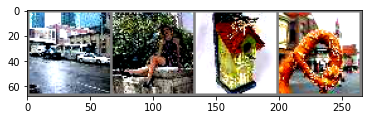

In [17]:
from general_utils import imshow

# get some random training images
dataiter = iter(img_train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % (labels[j]) for j in range(4)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


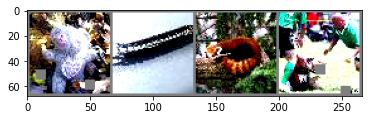

In [18]:
for data, classes in img_train_loader:
  out = torchvision.utils.make_grid(data)
  imshow(out)
  break

### Model Parameters

In [19]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# netobj = torchvision.models.resnet18(pretrained=False, num_classes=200)
netobj = ResNet18()
model = netobj.to(device)
summary(model, input_size=(3, 64, 64))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1,

### Training and Testing Loss

In [20]:
from train_ import train
from test_ import test
from torch.optim.lr_scheduler import ReduceLROnPlateau
criterion = nn.CrossEntropyLoss()


# lr_lambda = lambda epoch: round(0.1 * 1/(1 + 0.319 * epoch), 10)
# lr_lambda1 = lambda epoch : (epoch*0.7)\


model =  netobj.to(device)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.7, nesterov=True) #lr =1e-3
# # scheduler = StepLR(optimizer, step_size=1, gamma=1.1)
# scheduler = StepLR(optimizer, step_size=1, gamma=1.2)

optimizer = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=0.0025)
# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.3, patience=3, verbose=True, 
#                               threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)

scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr = 0.001, max_lr = 0.05, step_size_up=5, step_size_down=20, mode='triangular2')

EPOCHS = 50


test_acc = []
train_acc = []
trainloss_ = []
testloss_ = []
lr_= []
# loss=1000
# loss = 1000
for epoch in range(EPOCHS):  # loop over the dataset multiple times
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    print("EPOCH :", epoch)
    trainacc, loss = train(model, device, train_loader, optimizer, criterion, epoch)
    train_acc.append(trainacc)
    testacc, loss1 = test(model, device, test_loader, criterion)
    test_acc.append(testacc)
    trainloss_.append(loss)
    testloss_.append(loss1)
    scheduler.step()
    # lr_step = optimizer.state_dict()["param_groups"][0]["lr"]
    lr = param_group['lr']
    lr_.append(lr)
print('Finished Training')

  0%|          | 0/301 [00:00<?, ?it/s]

lr=  0.001
EPOCH : 0


Epoch= 0 Loss=4.733070373535156 Batch_id=300 Accuracy=6.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 4.714888 Test Accuracy= 5.9787878787878785
lr=  0.010800000000000008
EPOCH : 1


Epoch= 1 Loss=3.727783203125 Batch_id=300 Accuracy=20.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.8742328 Test Accuracy= 14.045454545454545
lr=  0.020600000000000018
EPOCH : 2


Epoch= 2 Loss=3.151470422744751 Batch_id=300 Accuracy=35.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 4.1253567 Test Accuracy= 12.215151515151515
lr=  0.030400000000000028
EPOCH : 3


Epoch= 3 Loss=3.227181911468506 Batch_id=300 Accuracy=32.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.38865 Test Accuracy= 21.903030303030302
lr=  0.040199999999999986
EPOCH : 4


Epoch= 4 Loss=2.9686052799224854 Batch_id=300 Accuracy=31.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.3529594 Test Accuracy= 25.206060606060607
lr=  0.04999999999999999
EPOCH : 5


Epoch= 5 Loss=2.813936710357666 Batch_id=300 Accuracy=47.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.228268 Test Accuracy= 26.993939393939392
lr=  0.04755
EPOCH : 6


Epoch= 6 Loss=2.6970760822296143 Batch_id=300 Accuracy=39.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.6846793 Test Accuracy= 33.60909090909091
lr=  0.0451
EPOCH : 7


Epoch= 7 Loss=2.5486032962799072 Batch_id=300 Accuracy=49.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.2324243 Test Accuracy= 30.196969696969695
lr=  0.042649999999999993
EPOCH : 8


Epoch= 8 Loss=2.398033380508423 Batch_id=300 Accuracy=52.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.0048938 Test Accuracy= 32.95454545454545
lr=  0.04020000000000001
EPOCH : 9


Epoch= 9 Loss=2.349851131439209 Batch_id=300 Accuracy=52.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.6539896 Test Accuracy= 35.875757575757575
lr=  0.037750000000000006
EPOCH : 10


Epoch= 10 Loss=2.393829584121704 Batch_id=300 Accuracy=56.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.6209333 Test Accuracy= 38.65151515151515
lr=  0.035300000000000005
EPOCH : 11


Epoch= 11 Loss=1.980685830116272 Batch_id=300 Accuracy=67.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.7839644 Test Accuracy= 36.56969696969697
lr=  0.032850000000000004
EPOCH : 12


Epoch= 12 Loss=2.1591620445251465 Batch_id=300 Accuracy=63.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.6173198 Test Accuracy= 40.733333333333334
lr=  0.0304
EPOCH : 13


Epoch= 13 Loss=2.1571123600006104 Batch_id=300 Accuracy=61.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.496556 Test Accuracy= 41.61212121212121
lr=  0.02795
EPOCH : 14


Epoch= 14 Loss=2.086162567138672 Batch_id=300 Accuracy=64.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.369153 Test Accuracy= 41.7
lr=  0.025499999999999995
EPOCH : 15


Epoch= 15 Loss=1.8370697498321533 Batch_id=300 Accuracy=68.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.4260845 Test Accuracy= 40.803030303030305
lr=  0.023049999999999994
EPOCH : 16


Epoch= 16 Loss=1.9337283372879028 Batch_id=300 Accuracy=70.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.4164603 Test Accuracy= 44.22121212121212
lr=  0.020599999999999993
EPOCH : 17


Epoch= 17 Loss=1.7108197212219238 Batch_id=300 Accuracy=69.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.4688532 Test Accuracy= 42.2030303030303
lr=  0.018150000000000003
EPOCH : 18


Epoch= 18 Loss=1.7840555906295776 Batch_id=300 Accuracy=74.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.4790516 Test Accuracy= 46.69090909090909
lr=  0.0157
EPOCH : 19


Epoch= 19 Loss=1.5409852266311646 Batch_id=300 Accuracy=74.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.158524 Test Accuracy= 46.38787878787879
lr=  0.013249999999999998
EPOCH : 20


Epoch= 20 Loss=1.361009955406189 Batch_id=300 Accuracy=79.50: 100%|██████████| 301/301 [03:03<00:00,  1.64it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.3083248 Test Accuracy= 46.587878787878786
lr=  0.010800000000000008
EPOCH : 21


Epoch= 21 Loss=1.2778735160827637 Batch_id=300 Accuracy=79.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.2610197 Test Accuracy= 48.3969696969697
lr=  0.008350000000000007
EPOCH : 22


Epoch= 22 Loss=1.1121742725372314 Batch_id=300 Accuracy=83.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.1793394 Test Accuracy= 50.13333333333333
lr=  0.005900000000000004
EPOCH : 23


Epoch= 23 Loss=0.8406609296798706 Batch_id=300 Accuracy=88.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.1680744 Test Accuracy= 50.33030303030303
lr=  0.003450000000000002
EPOCH : 24


Epoch= 24 Loss=0.478301465511322 Batch_id=300 Accuracy=93.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.164781 Test Accuracy= 53.481818181818184
lr=  0.001
EPOCH : 25


Epoch= 25 Loss=0.31006643176078796 Batch_id=300 Accuracy=97.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 1.7097574 Test Accuracy= 55.054545454545455
lr=  0.005900000000000004
EPOCH : 26


Epoch= 26 Loss=0.7315970659255981 Batch_id=300 Accuracy=92.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 1.9665748 Test Accuracy= 49.515151515151516
lr=  0.010800000000000008
EPOCH : 27


Epoch= 27 Loss=1.364335060119629 Batch_id=300 Accuracy=83.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.3752615 Test Accuracy= 44.96666666666667
lr=  0.015700000000000013
EPOCH : 28


Epoch= 28 Loss=1.3669053316116333 Batch_id=300 Accuracy=82.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.4507675 Test Accuracy= 43.27272727272727
lr=  0.020600000000000018
EPOCH : 29


Epoch= 29 Loss=1.5545376539230347 Batch_id=300 Accuracy=80.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.3501375 Test Accuracy= 44.78787878787879
lr=  0.025499999999999995
EPOCH : 30


Epoch= 30 Loss=1.5571796894073486 Batch_id=300 Accuracy=83.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.4999087 Test Accuracy= 41.518181818181816
lr=  0.024274999999999994
EPOCH : 31


Epoch= 31 Loss=1.3907374143600464 Batch_id=300 Accuracy=86.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.4323342 Test Accuracy= 42.736363636363635
lr=  0.023049999999999994
EPOCH : 32


Epoch= 32 Loss=1.4662089347839355 Batch_id=300 Accuracy=82.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.3915708 Test Accuracy= 42.903030303030306
lr=  0.021824999999999994
EPOCH : 33


Epoch= 33 Loss=1.432019829750061 Batch_id=300 Accuracy=86.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.6297767 Test Accuracy= 44.91818181818182
lr=  0.020599999999999993
EPOCH : 34


Epoch= 34 Loss=1.1378096342086792 Batch_id=300 Accuracy=88.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.7079103 Test Accuracy= 43.554545454545455
lr=  0.019375000000000003
EPOCH : 35


Epoch= 35 Loss=1.3213722705841064 Batch_id=300 Accuracy=89.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.705813 Test Accuracy= 40.1
lr=  0.018150000000000003
EPOCH : 36


Epoch= 36 Loss=1.1345467567443848 Batch_id=300 Accuracy=89.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.4319987 Test Accuracy= 44.627272727272725
lr=  0.016925000000000003
EPOCH : 37


Epoch= 37 Loss=1.0611873865127563 Batch_id=300 Accuracy=91.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.3422234 Test Accuracy= 46.56666666666667
lr=  0.0157
EPOCH : 38


Epoch= 38 Loss=0.9632971286773682 Batch_id=300 Accuracy=92.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.356995 Test Accuracy= 44.72727272727273
lr=  0.014474999999999998
EPOCH : 39


Epoch= 39 Loss=0.7768400311470032 Batch_id=300 Accuracy=95.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.2586815 Test Accuracy= 45.445454545454545
lr=  0.013249999999999998
EPOCH : 40


Epoch= 40 Loss=0.7958300709724426 Batch_id=300 Accuracy=96.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.4727757 Test Accuracy= 44.8969696969697
lr=  0.012025000000000011
EPOCH : 41


Epoch= 41 Loss=0.7756083607673645 Batch_id=300 Accuracy=94.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.403547 Test Accuracy= 45.2030303030303
lr=  0.010800000000000008
EPOCH : 42


Epoch= 42 Loss=0.6310386061668396 Batch_id=300 Accuracy=96.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.618627 Test Accuracy= 46.68181818181818
lr=  0.009575000000000007
EPOCH : 43


Epoch= 43 Loss=0.4423602223396301 Batch_id=300 Accuracy=98.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.1297493 Test Accuracy= 47.73939393939394
lr=  0.008350000000000007
EPOCH : 44


Epoch= 44 Loss=0.4422401189804077 Batch_id=300 Accuracy=99.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.1406648 Test Accuracy= 48.981818181818184
lr=  0.0071250000000000055
EPOCH : 45


Epoch= 45 Loss=0.2844640016555786 Batch_id=300 Accuracy=99.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.1719623 Test Accuracy= 50.92424242424242
lr=  0.005900000000000004
EPOCH : 46


Epoch= 46 Loss=0.21236003935337067 Batch_id=300 Accuracy=99.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.2545173 Test Accuracy= 51.587878787878786
lr=  0.004675000000000004
EPOCH : 47


Epoch= 47 Loss=0.10893405973911285 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 1.7554214 Test Accuracy= 52.67575757575757
lr=  0.003450000000000002
EPOCH : 48


Epoch= 48 Loss=0.08887692540884018 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.0641918 Test Accuracy= 53.657575757575756
lr=  0.0022250000000000013
EPOCH : 49


Epoch= 49 Loss=0.06386871635913849 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
100%|██████████| 129/129 [00:32<00:00,  3.95it/s]

Test Loss= 2.0364213 Test Accuracy= 54.34848484848485
Finished Training
